In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')

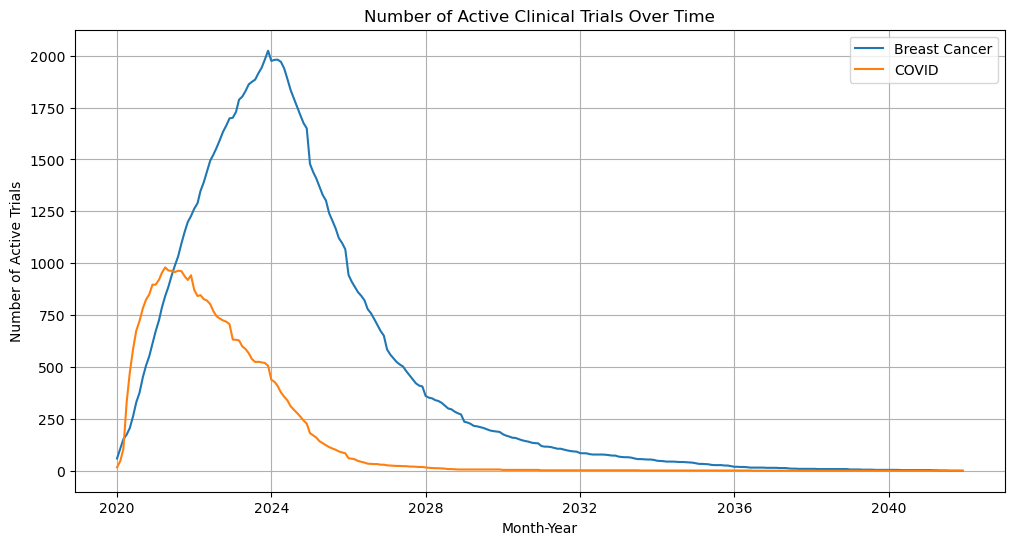

"\n########## Plotting\nplt.figure(figsize=(12, 6))\nplt.plot(plot_df['month_year'], plot_df['active_trials'], marker='o')\nplt.title('Number of Active Clinical Trials Over Time')\nplt.xlabel('Month-Year')\nplt.ylabel('Number of Active Trials')\nplt.grid(True)\nplt.show()\n"

In [74]:
######## BREAST CANCER ############

breast_cancer_df['Start Month'] = pd.DatetimeIndex(breast_cancer_df['Start Date']).month
breast_cancer_df['Start Year'] = pd.DatetimeIndex(breast_cancer_df['Start Date']).year

breast_cancer_df['End Month'] = pd.DatetimeIndex(breast_cancer_df['Completion Date']).month
breast_cancer_df['End Year'] = pd.DatetimeIndex(breast_cancer_df['Completion Date']).year

# Convert start and end dates to datetime objects
breast_cancer_df['start_date'] = pd.to_datetime(breast_cancer_df['Start Year'].astype(str) + '-' + breast_cancer_df['Start Month'].astype(str) + '-01')
breast_cancer_df['end_date'] = pd.to_datetime(breast_cancer_df['End Year'].astype(str) + '-' + breast_cancer_df['End Month'].astype(str) + '-01')

# Create a new DataFrame for plotting
bc_plot_df = pd.DataFrame(columns=['month_year', 'active_trials'])

######## COVID ############

covid_df['Start Month'] = pd.DatetimeIndex(covid_df['Start Date']).month
covid_df['Start Year'] = pd.DatetimeIndex(covid_df['Start Date']).year

covid_df['End Month'] = pd.DatetimeIndex(covid_df['Completion Date']).month
covid_df['End Year'] = pd.DatetimeIndex(covid_df['Completion Date']).year

# Convert start and end dates to datetime objects
covid_df['start_date'] = pd.to_datetime(covid_df['Start Year'].astype(str) + '-' + covid_df['Start Month'].astype(str) + '-01')
covid_df['end_date'] = pd.to_datetime(covid_df['End Year'].astype(str) + '-' + covid_df['End Month'].astype(str) + '-01')

# Create a new DataFrame for plotting
c_plot_df = pd.DataFrame(columns=['month_year', 'active_trials'])

# Iterate over each month and year
for year in range(breast_cancer_df['Start Year'].min(), breast_cancer_df['End Year'].max() + 1):
    for month in range(1, 13):
        current_date = pd.to_datetime(f"{year}-{month:02d}-01")
        
        #breast cancer
        active_trials_bc = ((breast_cancer_df['start_date'] <= current_date) & (breast_cancer_df['end_date'] >= current_date)).sum()
        bc_plot_df = pd.concat([bc_plot_df, pd.DataFrame({'month_year': [current_date], 'active_trials': [active_trials_bc]})])
        
        # covid
        active_trials_c = ((covid_df['start_date'] <= current_date) & (covid_df['end_date'] >= current_date)).sum()
        c_plot_df = pd.concat([c_plot_df, pd.DataFrame({'month_year': [current_date], 'active_trials': [active_trials_c]})])


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(bc_plot_df['month_year'], bc_plot_df['active_trials'], label='Breast Cancer', marker='')
plt.plot(c_plot_df['month_year'], c_plot_df['active_trials'], label='COVID', marker='')
plt.title('Number of Active Clinical Trials Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Active Trials')
plt.legend()
plt.grid(True)
plt.show()
